In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
adult19 = pd.read_csv("./datathon_data/adult19.csv")
adult19

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_QRT,RECTYPE,WTFA_A,WTIA_A,HHX,POVRATTC_A
0,4,9,3,0,60000,2,2,122,3,2,...,NaN,NaN,1,1,1,10,13177.008,7601.336,H048109,2.96
1,4,9,3,0,50000,0,2,122,2,1,...,NaN,NaN,1,1,1,10,6140.552,3344.434,H027044,2.97
2,4,12,3,0,65000,1,2,122,2,1,...,NaN,NaN,1,1,1,10,9191.061,6949.498,H058855,4.28
3,4,14,5,0,120000,0,2,122,1,8,...,NaN,NaN,1,1,1,10,7900.035,6446.327,H031993,7.13
4,1,4,1,0,30000,0,2,115,2,1,...,NaN,NaN,1,1,1,10,10875.772,8646.586,H007122,1.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31992,4,14,5,0,116204,0,100,114,2,1,...,NaN,NaN,1,1,4,10,2679.016,1965.416,H046022,7.65
31993,4,8,3,0,68000,0,100,114,2,1,...,NaN,NaN,1,1,4,10,6726.495,3920.208,H046232,2.02
31994,4,13,3,0,60000,0,100,114,2,1,...,NaN,NaN,1,1,4,10,1246.306,864.743,H043765,4.98
31995,4,14,5,0,101000,0,100,114,1,1,...,NaN,NaN,1,1,4,10,3427.198,2595.209,H017695,6.00


In [8]:
diab_or_not = adult19.query("DIBEV_A == 2 or DIBTYPE_A == 1 or DIBTYPE_A == 2")

In [9]:
diab_or_not['DIBTYPE_A'] = diab_or_not['DIBTYPE_A'].fillna(0)

/var/folders/x1/k3ptxk310g7b4zbs2v_tgykh0000gn/T/ipykernel_37437/2455666195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diab_or_not['DIBTYPE_A'] = diab_or_not['DIBTYPE_A'].fillna(0)


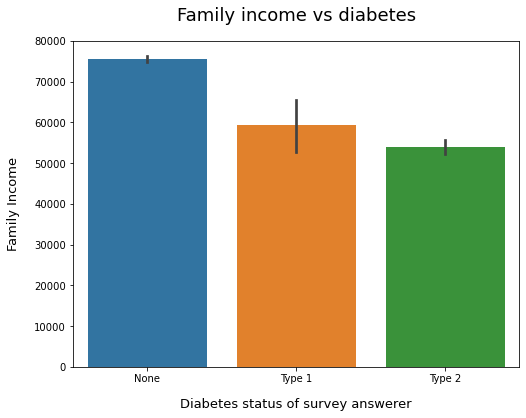

In [60]:
plt.figure(figsize=(8, 6))

sns.barplot(data=diab_or_not, x="DIBTYPE_A", y="FAMINCTC_A")
plt.xticks(ticks=[0,1,2], labels=['None','Type 1','Type 2'])
plt.xlabel("Diabetes status of survey answerer", fontsize=13, labelpad=14)
plt.ylabel("Family Income", fontsize=13, labelpad=14)
plt.title("Family income vs diabetes", pad=20, fontsize=18)

plt.savefig('./test3.png')
plt.show();

In [11]:
worked_or_not = diab_or_not.query("EMPWRKLSWK_A == 1 or EMPWRKLSWK_A == 2 and EDUC_A < 97")
worked_or_not = worked_or_not.query("HEIGHTTC_A < 95 and WEIGHTLBTC_A < 300 and FAMINCTC_A > 0 and AGEP_A < 97")
worked_or_not["EMPWRKLSWK_A"] = 2 - worked_or_not["EMPWRKLSWK_A"]

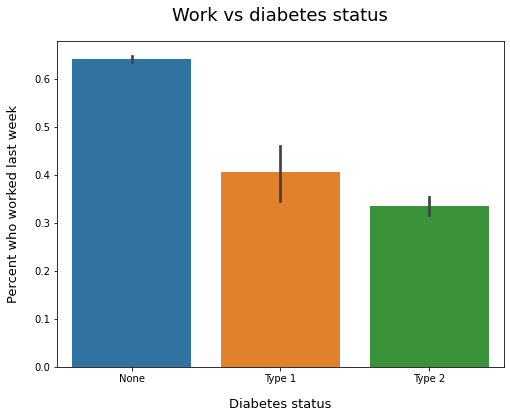

In [36]:
plt.figure(figsize=(8, 6))

sns.barplot(data=worked_or_not, x="DIBTYPE_A", y="EMPWRKLSWK_A")
plt.xticks(ticks=[0,1,2], labels=['None','Type 1','Type 2'])
plt.xlabel("Diabetes status",fontsize=13, labelpad=14)
plt.ylabel("Percent who worked last week",fontsize=13, labelpad=14)
plt.title("Work vs diabetes status", pad=20, fontsize=18)

plt.show();

In [37]:
worked_or_not["education"] = np.zeros(len(worked_or_not))
worked_or_not["education"] += 12 * ((worked_or_not["EDUC_A"] >= 3) & (worked_or_not["EDUC_A"] <= 4)).astype(int)
worked_or_not['education'] += 14 * ((worked_or_not["EDUC_A"] >= 5) & (worked_or_not["EDUC_A"] <= 7)).astype(int)
worked_or_not['education'] += 16 * ((worked_or_not["EDUC_A"] == 8)).astype(int)
worked_or_not['education'] += 18 * ((worked_or_not["EDUC_A"] >= 9) & (worked_or_not["EDUC_A"] <= 10)).astype(int)
worked_or_not['education'] += 22 * ((worked_or_not["EDUC_A"] == 11)).astype(int)

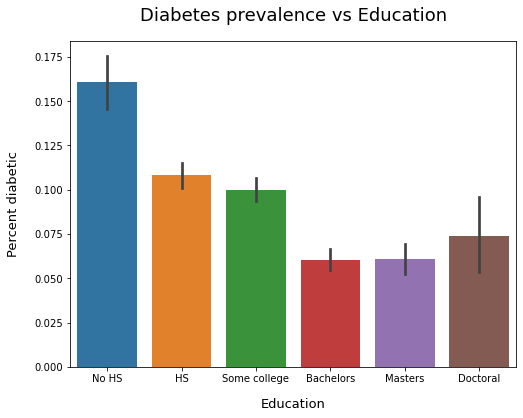

In [39]:
plt.figure(figsize=(8, 6))

sns.barplot(x=worked_or_not["education"], y=2-worked_or_not["DIBEV_A"])
plt.xticks(ticks=[0,1,2,3,4,5], labels=['No HS','HS','Some college', 'Bachelors', 'Masters', 'Doctoral'])
plt.xlabel("Education", labelpad=14,fontsize=13)
plt.ylabel("Percent diabetic", labelpad=14,fontsize=13)
plt.title("Diabetes prevalence vs Education", fontsize=18,pad=20)

plt.show();

In [40]:
worked_or_not["education squared"] = np.square(worked_or_not["education"])

In [41]:
import statsmodels.api as sm
import statsmodels as sms
from statsmodels.tools import add_constant

In [42]:
worked_or_not = worked_or_not.join(pd.get_dummies(worked_or_not['education']))

In [43]:
worked_or_not['married'] = np.zeros(len(worked_or_not))
worked_or_not['married'] += 1 * ((worked_or_not['MARITAL_A'] == 1) | (worked_or_not['MARITAL_A'] == 2)).astype(int)

/var/folders/x1/k3ptxk310g7b4zbs2v_tgykh0000gn/T/ipykernel_37437/435131604.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  worked_or_not['married'] = np.zeros(len(worked_or_not))


In [44]:
worked_or_not['bmi'] = worked_or_not['WEIGHTLBTC_A'] / np.square(worked_or_not['HEIGHTTC_A'])

/var/folders/x1/k3ptxk310g7b4zbs2v_tgykh0000gn/T/ipykernel_37437/1425203440.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  worked_or_not['bmi'] = worked_or_not['WEIGHTLBTC_A'] / np.square(worked_or_not['HEIGHTTC_A'])


In [45]:
worked_or_not['bmi squared'] = np.square(worked_or_not['bmi'])

/var/folders/x1/k3ptxk310g7b4zbs2v_tgykh0000gn/T/ipykernel_37437/1454930030.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  worked_or_not['bmi squared'] = np.square(worked_or_not['bmi'])


In [46]:
worked_or_not['type1'] = (worked_or_not['DIBTYPE_A'] == 1).astype(int)

/var/folders/x1/k3ptxk310g7b4zbs2v_tgykh0000gn/T/ipykernel_37437/2037960763.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  worked_or_not['type1'] = (worked_or_not['DIBTYPE_A'] == 1).astype(int)


In [47]:
worked_or_not['type2'] = (worked_or_not['DIBTYPE_A'] == 2).astype(int)

/var/folders/x1/k3ptxk310g7b4zbs2v_tgykh0000gn/T/ipykernel_37437/1282328217.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  worked_or_not['type2'] = (worked_or_not['DIBTYPE_A'] == 2).astype(int)


In [48]:
worked_or_not['age squared'] = np.square(worked_or_not['AGEP_A'])
worked_or_not['age'] = worked_or_not["AGEP_A"]

/var/folders/x1/k3ptxk310g7b4zbs2v_tgykh0000gn/T/ipykernel_37437/2728148591.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  worked_or_not['age squared'] = np.square(worked_or_not['AGEP_A'])
/var/folders/x1/k3ptxk310g7b4zbs2v_tgykh0000gn/T/ipykernel_37437/2728148591.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  worked_or_not['age'] = worked_or_not["AGEP_A"]


In [49]:
worked_or_not['log family income'] = np.log(worked_or_not['FAMINCTC_A'])
worked_or_not['worked last week'] = worked_or_not['EMPWRKLSWK_A']

/var/folders/x1/k3ptxk310g7b4zbs2v_tgykh0000gn/T/ipykernel_37437/2921491907.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  worked_or_not['log family income'] = np.log(worked_or_not['FAMINCTC_A'])
/var/folders/x1/k3ptxk310g7b4zbs2v_tgykh0000gn/T/ipykernel_37437/2921491907.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  worked_or_not['worked last week'] = worked_or_not['EMPWRKLSWK_A']


In [50]:
worked_or_not['minority'] = (worked_or_not['HISPALLP_A'] != 2).astype(int)

/var/folders/x1/k3ptxk310g7b4zbs2v_tgykh0000gn/T/ipykernel_37437/1093977519.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  worked_or_not['minority'] = (worked_or_not['HISPALLP_A'] != 2).astype(int)


In [51]:
worked_or_not['female'] = (worked_or_not['SEX_A'] == 2).astype(int)

/var/folders/x1/k3ptxk310g7b4zbs2v_tgykh0000gn/T/ipykernel_37437/1341525047.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  worked_or_not['female'] = (worked_or_not['SEX_A'] == 2).astype(int)


In [52]:
worked_or_not['diabetic'] = np.zeros(len(worked_or_not))
worked_or_not['diabetic'] += 1 * ((worked_or_not['DIBTYPE_A'] == 1) | (worked_or_not['DIBTYPE_A'] == 2)).astype(int)

/var/folders/x1/k3ptxk310g7b4zbs2v_tgykh0000gn/T/ipykernel_37437/98226934.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  worked_or_not['diabetic'] = np.zeros(len(worked_or_not))


In [53]:
reg = sm.OLS(exog=add_constant(worked_or_not[['age', 'age squared', 0,12,14,16,18, 'married', 'diabetic', 'type1', 'bmi', 'bmi squared', 'female', 'minority']]), endog=worked_or_not['log family income']).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:      log family income   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     888.3
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:07:50   Log-Likelihood:                -32642.
No. Observations:               28010   AIC:                         6.531e+04
Df Residuals:                   27995   BIC:                         6.544e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.8292      0.110     98.464      

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [54]:
reg = sm.OLS(exog=add_constant(worked_or_not[['age', 'age squared', 0,12,14,16,18, 'married', 'type1', 'bmi', 'bmi squared', 'female', 'minority']]), endog=worked_or_not['log family income']).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:      log family income   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     949.4
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:07:50   Log-Likelihood:                -32675.
No. Observations:               28010   AIC:                         6.538e+04
Df Residuals:                   27996   BIC:                         6.549e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.8578      0.110     98.663      

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
reg = sm.OLS(exog=add_constant(worked_or_not[['age', 'age squared', 0,12,14,16,18, 'married', 'type2', 'bmi', 'bmi squared', 'female', 'minority']]), endog=worked_or_not['log family income']).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:      log family income   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     955.9
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:48:47   Log-Likelihood:                -32645.
No. Observations:               28010   AIC:                         6.532e+04
Df Residuals:                   27996   BIC:                         6.543e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.8289      0.110     98.452      

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
reg2 = sm.OLS(exog=add_constant(worked_or_not[['age', 'age squared', 0,12,14,16,18, 'married', 'diabetic', 'bmi', 'bmi squared', 'female', 'minority']]), endog=worked_or_not['worked last week']).fit()
print(reg2.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:       worked last week   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1178.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:48:47   Log-Likelihood:                -13483.
No. Observations:               28010   AIC:                         2.699e+04
Df Residuals:                   27996   BIC:                         2.711e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2228      0.055      4.015      

In [27]:
reg2 = sm.OLS(exog=add_constant(worked_or_not[['age', 'age squared', 0,12,14,16,18, 'married', 'type1', 'bmi', 'bmi squared', 'female', 'minority']]), endog=worked_or_not['worked last week']).fit()
print(reg2.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:       worked last week   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     1163.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:48:47   Log-Likelihood:                -13548.
No. Observations:               28010   AIC:                         2.712e+04
Df Residuals:                   27996   BIC:                         2.724e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2445      0.056      4.398      

In [28]:
reg2 = sm.OLS(exog=add_constant(worked_or_not[['age', 'age squared', 0,12,14,16,18, 'married', 'type2', 'bmi', 'bmi squared', 'female', 'minority']]), endog=worked_or_not['worked last week']).fit()
print(reg2.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:       worked last week   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1175.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:48:47   Log-Likelihood:                -13498.
No. Observations:               28010   AIC:                         2.702e+04
Df Residuals:                   27996   BIC:                         2.714e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2236      0.056      4.026      